In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import re
df = pd.read_csv("library2017.csv")
k = df.copy()
s = k.sort_values("YTD")
print(s)
df['LOCATION'] = df['LOCATION'].str.rstrip()
df = df.where((df['LOCATION'] == 'Chinatown') | (df['LOCATION'] == 'Harold Washington Library Center*') | (df['LOCATION'] == 'Rogers Park'))
df = df.dropna().reset_index(drop = True)

df1 = pd.read_csv("library2018.csv")
df1['LOCATION'] = df1['LOCATION'].str.rstrip()
df1 = df1.where((df1['LOCATION'] == 'Chinatown') | (df1['LOCATION'] == 'Harold Washington Library Center*') | (df1['LOCATION'] == 'Rogers Park'))
df1 = df1.dropna().reset_index(drop = True)

df2 = pd.read_csv("library2019.csv")
df2['LOCATION'] = df2['LOCATION'].str.rstrip()

       
df2 = df2.where((df2['LOCATION'] == 'Chinatown') | (df2['LOCATION'] == 'Harold Washtington Library Center') | (df2['LOCATION'] == 'Rogers Park'))
df2 = df2.dropna().reset_index(drop = True)
df2["LOCATION"] = df2['LOCATION'].str.replace("Washtington","Washington")
df2['LOCATION'] = df2["LOCATION"].str.replace("Center","Center*")
df2 = df2.drop(['ADDRESS', 'CITY','ZIP','YTD'], axis=1)


df = df.append(df1, ignore_index = True)
df = df.append(df2, ignore_index = True)
df = df.groupby(['LOCATION']).mean()
df = df.drop(['YTD'],axis =1)
print(df)

                             LOCATION  JANUARY  FEBRUARY   MARCH   APRIL  \
2                       Independence         0         0       0       0   
63                   Woodson Regional        0         0       0       0   
73               Galewood-Mont Clare      1476      1626    1658    1535   
41            Greater Grand Crossing*     2583      2310    2896    2571   
7                           Altgeld       3069      2864    3362    2992   
..                                ...      ...       ...     ...     ...   
34                       Rogers Park     12529     11349   13277   13307   
24                        Edgewater      15249     14914   17332   16561   
22                         Chinatown     19074     18627   22790   23416   
62                   Sulzer Regional*    28355     26122   29257   32502   
70  Harold Washington Library Center*    97533     84661  106782  101963   

       MAY    JUNE    JULY  AUGUST  SEPTEMBER  OCTOBER  NOVEMBER  DECEMBER  \
2        

In [126]:
chinatown = {}
harold = {}
rogers = {}
for j in df.columns:
    chinatown[j] = df.iloc[0][j]
    harold[j] = df.iloc[1][j]
    rogers[j] = df.iloc[2][j]

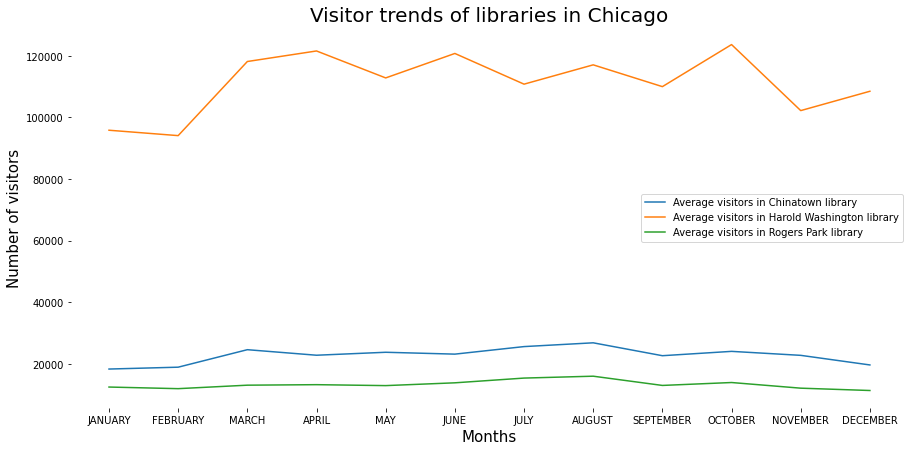

In [142]:
x = chinatown.keys()
plt.figure(figsize = (15,7))
plt.plot(list(x), list(chinatown.values()), label = "Average visitors in Chinatown library")
plt.plot(list(harold.keys()), list(harold.values()), label = "Average visitors in Harold Washington library")
plt.plot(list(rogers.keys()), list(rogers.values()), label = "Average visitors in Rogers Park library")
plt.xlabel("Months", fontsize = 15)
plt.ylabel("Number of visitors", fontsize = 15)
plt.title("Visitor trends of libraries in Chicago", fontsize = 20)
plt.legend()
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.savefig("library1.png")
plt.show()